In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['figure.dpi'] = 300

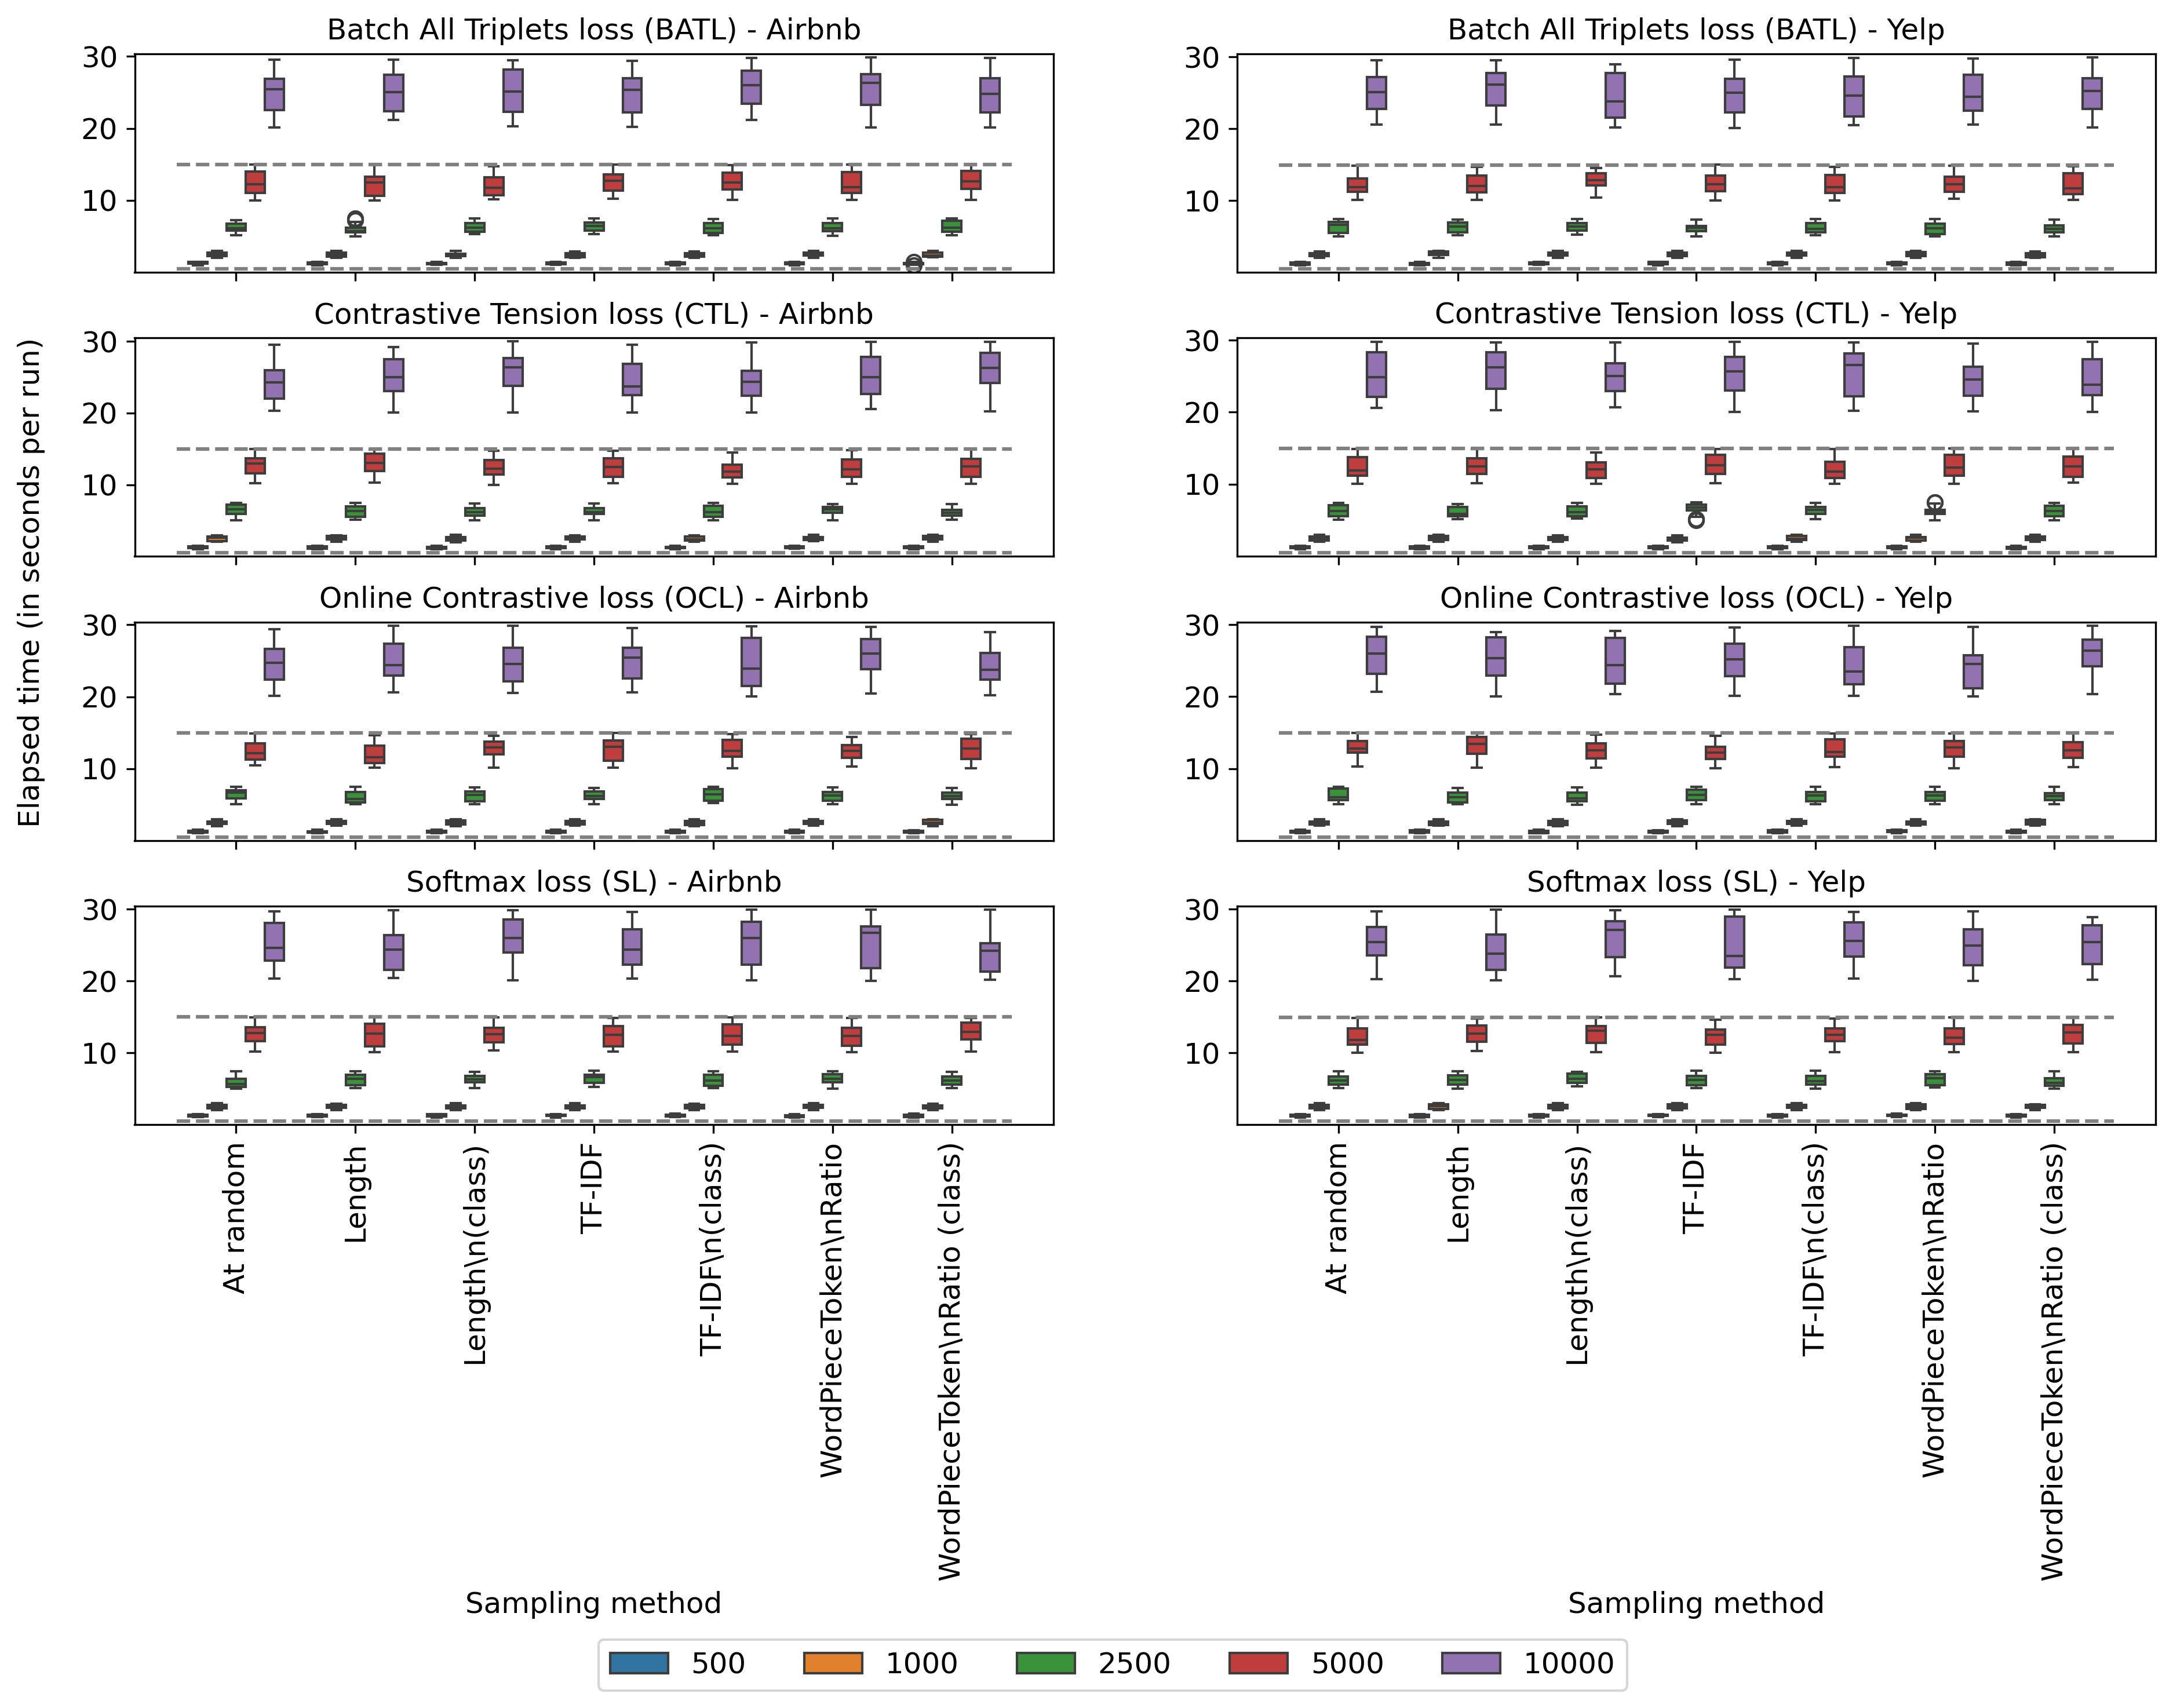

In [3]:
"""
If you use this code, please consider citing the following paper:

@inproceedings{garcia2025improving,
  title={Improving sampling methods for fine-tuning SentenceBERT in text streams},
  author={Garcia, Cristiano Mesquita and Koerich, Alessandro Lameiras and Britto Jr, Alceu de Souza and Barddal, Jean Paul},
  booktitle={International Conference on Pattern Recognition},
  pages={445--459},
  year={2025},
  organization={Springer}
}
"""

# Load reference data (for the dashed lines)
df_noupdate = pd.read_csv("references.csv")

# Load the data to be displayed
df = pd.read_csv("data.csv")

# Define number of subplots
fig, ax = plt.subplots(nrows=4, ncols=2, sharey=False, sharex=True, figsize=(15,8))

# Some mapping for human legibility only
datas = {
    'airbnb': 'Airbnb',
    'yelp': 'Yelp'
}

datasets = ['airbnb', 'yelp']

order = [
    "At random",
    "Length",
    "Length (class)",
    "TF-IDF",
    "TF-IDF (class)",
    "WordPieceToken Ratio",
    "WordPieceToken Ratio (class)",
]

loss_strategies = {
    'batl': 'Batch All Triplets loss (BATL)',
    'ctl': "Contrastive Tension loss (CTL)",
    'ocl': "Online Contrastive loss (OCL)",
    'softmax': "Softmax loss (SL)"
}

mapping = {
    "At random": "At random",
    "Length": "Length",
    "Length (class)": "Length\\n(class)",
    "TF-IDF": "TF-IDF",
    "TF-IDF (class)": "TF-IDF\\n(class)",
    "WordPieceToken Ratio": "WordPieceToken\\nRatio",
    "WordPieceToken Ratio (class)": "WordPieceToken\\nRatio (class)",
}

if list(mapping.keys())[0] in df['sampling_method'].unique():
    df['sampling_method'] = df['sampling_method'].apply(lambda x: mapping[x])

order = [mapping[o] for o in order]

# Converting to string so the plot considers it a category instead of continuous values
df['size'] = df['size'].apply(str)

fontsize = 12
for ils, (ls, ls_name) in enumerate(loss_strategies.items()):
    for ids, ds in enumerate(datasets):
        # Plot data on subplots considering the dataset, loss strategy, sampling sizes, and Macro F1 values.
        sns.boxplot(data=df[(df['dataset']==ds)&(df['loss_strategy']==ls)&(df['size'] != 'No update')], x="sampling_method", y="Macro F1", hue="size", ax=ax[ils,ids], \
                   order=order)

        # Customize subplot titles and font sizes
        ax[ils, ids].set_title(f"{ls_name} - {datas[ds]}", fontdict={'fontsize': fontsize})
        ax[ils, ids].tick_params(axis='x', labelsize=fontsize, rotation=90)
        ax[ils, ids].tick_params(axis='y', labelsize=fontsize)

        # Calculating values to set y limits.
        ref = df[(df['dataset']==ds)&(df['loss_strategy']==ls)&(df['size'] != 'No update')]
        df_update = df_noupdate[df_noupdate['dataset']==ds]

        q3 = df_update['Macro F1'].max()
        q1 = df_update['Macro F1'].min()

        max_vec = max(q3, ref['Macro F1'].max())
        min_vec = min(q1, ref['Macro F1'].min())

        # Set y limits to properly show the biggest values (considering data and references)
        ax[ils, ids].set_ylim(min_vec-.5, max_vec+.5)
        ax[ils, ids].set_ylabel("", fontsize=fontsize)

        ax[ils, ids].hlines(q1, -0.5, 6.5, 'gray', linestyle='dashed')
        ax[ils, ids].hlines(q3, -0.5, 6.5, 'gray', linestyle='dashed')

# Code to unify the legends, so there will not be one legend per subplot.
handles, labels = ax[0, 0].get_legend_handles_labels()

for ils, (ls, ls_name) in enumerate(loss_strategies.items()):
    for ids, ds in enumerate(datasets):
        ax[ils, ids].legend().set_visible(False)

# Position the new legend and define the distance between subplots.
fig.legend(handles, labels, prop={'size': fontsize}, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=5)
plt.subplots_adjust(hspace=0.3)

# Set y label.
fig.text(0.08, 0.5, 'Elapsed time (in seconds per run)', va='center', rotation='vertical', fontsize=fontsize)

# Define x label for both (right and left) plots
ax[-1,-1].set_xlabel("Sampling method", fontsize=fontsize);
ax[-1,0].set_xlabel("Sampling method", fontsize=fontsize);